In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/esitdataset.csv", sep=';')

In [ ]:
df= data.copy()

In [ ]:
df.head()
#outT =outdoor temperature, inT= indoor temperature, inCo= indoor CO2, inH = indoor humidity, winS =window state (1= open, 0= closed)

,outT,inT,inCo,inH,winS
0,25,26,656,52,0
1,23,25,517,57,0
2,27,29,686,50,0
3,26,23,719,54,0
4,22,25,520,60,0


In [ ]:
df.info()
#154 open window, 154 closed window state, 308 in total.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   outT    308 non-null    int64
 1   inT     308 non-null    int64
 2   inCo    308 non-null    int64
 3   inH     308 non-null    int64
 4   winS    308 non-null    int64
dtypes: int64(5)
memory usage: 12.2 KB


In [ ]:
# split the data into inputs and outputs
X = df.iloc[:, [0,3]].values
y = df.iloc[:,4].values

In [ ]:
# training and testing data
from sklearn.model_selection import train_test_split

# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

In [ ]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
#different scales in the input variables
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
# import Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
classifer1 = GaussianNB()

# training the model
classifer1.fit(X_train, y_train)

# testing the model
y_pred1 = classifer1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred1))


0.8051948051948052


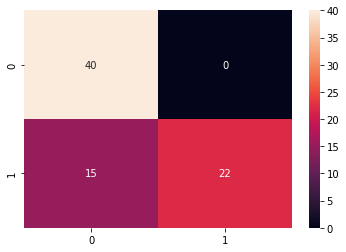

In [ ]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred1)

# true write data values in each cell of the matrix
sns.heatmap(cm,annot=True)
#plt.savefig('confusion.png')

In [ ]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        40
           1       1.00      0.59      0.75        37

    accuracy                           0.81        77
   macro avg       0.86      0.80      0.79        77
weighted avg       0.86      0.81      0.80        77

